# INT375 - CA2

## Importing all necessary libraries

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load dataset

In [20]:
df = pd.read_csv(r"C:\Users\Ashish Kumar\Downloads\dynamic_pricing.csv")
df

,Number_of_Riders,Number_of_Drivers,Location_Category,Customer_Loyalty_Status,Number_of_Past_Rides,Average_Ratings,Time_of_Booking,Vehicle_Type,Expected_Ride_Duration,Historical_Cost_of_Ride
0,90,45,Urban,Silver,13,4.47,Night,Premium,90,284.257273
1,58,39,Suburban,Silver,72,4.06,Evening,Economy,43,173.874753
2,42,31,Rural,Silver,0,3.99,Afternoon,Premium,76,329.795469
3,89,28,Rural,Regular,67,4.31,Afternoon,Premium,134,470.201232
4,78,22,Rural,Regular,74,3.77,Afternoon,Economy,149,579.681422
...,...,...,...,...,...,...,...,...,...,...
995,33,23,Urban,Gold,24,4.21,Morning,Premium,11,91.389526
996,84,29,Urban,Regular,92,4.55,Morning,Premium,94,424.155987
997,44,6,Suburban,Gold,80,4.13,Night,Premium,40,157.364830
998,53,27,Suburban,Regular,78,3.63,Night,Premium,58,279.095048


## 2. Overview Of the Dataset

In [21]:
print(df.head())
print(df.info())

   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban   
2                42                 31             Rural   
3                89                 28             Rural   
4                78                 22             Rural   

  Customer_Loyalty_Status  Number_of_Past_Rides  Average_Ratings  \
0                  Silver                    13             4.47   
1                  Silver                    72             4.06   
2                  Silver                     0             3.99   
3                 Regular                    67             4.31   
4                 Regular                    74             3.77   

  Time_of_Booking Vehicle_Type  Expected_Ride_Duration  \
0           Night      Premium                      90   
1         Evening      Economy                      43   
2       Afternoon      Premium                      76  

## 3. Data Cleaning

In [22]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Handle missing values (if any)
df.dropna(inplace=True)

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Convert Time_of_Booking to categorical
df["Time_of_Booking"] = df["Time_of_Booking"].astype("category")

# Validate numerical ranges ( ratings between 0 and 5)
df = df[(df['Average_Ratings'] >= 0) & (df['Average_Ratings'] <= 5)]

# Reset index after cleaning
df.reset_index(drop=True, inplace=True)

# Display cleaned data summary
print(df.info())
print(df.head())


Missing Values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Duplicate Rows: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Number_of_Riders         1000 non-null   int64   
 1   Number_of_Drivers        1000 non-null   int64   
 2   Location_Category        1000 non-null   object  
 3   Customer_Loyalty_Status  1000 non-null   object  
 4   Number_of_Past_Rides     1000 non-null   int64   
 5   Average_Ratings          1000 non-null   float64 
 6   Time_of_Booking          1000 non-null   category
 7   Vehicle_Type             1000 non-null   object  
 8  

## 4. Performing Exploratory Data Analysis (EDA)

In [23]:
print(" Shape of Dataset:", df.shape)
print("\nNull Values:\n", df.isnull().sum())
print("\nMissing Values: \n", df.isnull().sum().sum())
print("\nData Types:\n", df.dtypes)
print("\nSummary Stats:\n", df.describe(include='all').T)
# Value counts for categorical columns
# Standardize categorical values
categorical_cols = ['Location_Category', 'Customer_Loyalty_Status', 'Time_of_Booking', 'Vehicle_Type']
for col in categorical_cols:
    print(f"\n Value Counts for {col}:\n", df[col].value_counts())
    
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
print("\nCorrelation Matrix:\n", correlation_matrix)

# Detect Outliers using IQR
Q1 = df["Historical_Cost_of_Ride"].quantile(0.25)
Q3 = df["Historical_Cost_of_Ride"].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df["Historical_Cost_of_Ride"] < (Q1 - 1.5 * IQR)) |
            (df["Historical_Cost_of_Ride"] > (Q3 + 1.5 * IQR)))
print("\nOutliers in Ride Cost:", outliers.sum())

 Shape of Dataset: (1000, 10)

Null Values:
 Number_of_Riders           0
Number_of_Drivers          0
Location_Category          0
Customer_Loyalty_Status    0
Number_of_Past_Rides       0
Average_Ratings            0
Time_of_Booking            0
Vehicle_Type               0
Expected_Ride_Duration     0
Historical_Cost_of_Ride    0
dtype: int64

Missing Values: 
 0

Data Types:
 Number_of_Riders              int64
Number_of_Drivers             int64
Location_Category            object
Customer_Loyalty_Status      object
Number_of_Past_Rides          int64
Average_Ratings             float64
Time_of_Booking            category
Vehicle_Type                 object
Expected_Ride_Duration        int64
Historical_Cost_of_Ride     float64
dtype: object

Summary Stats:
                           count unique      top freq        mean         std  \
Number_of_Riders         1000.0    NaN      NaN  NaN      60.372   23.701506   
Number_of_Drivers        1000.0    NaN      NaN  NaN      27.076  

## 5. Data Visualization

In [24]:
plt.style.use("ggplot")

#### 🔷 Histogram: Distribution of Ride Cost

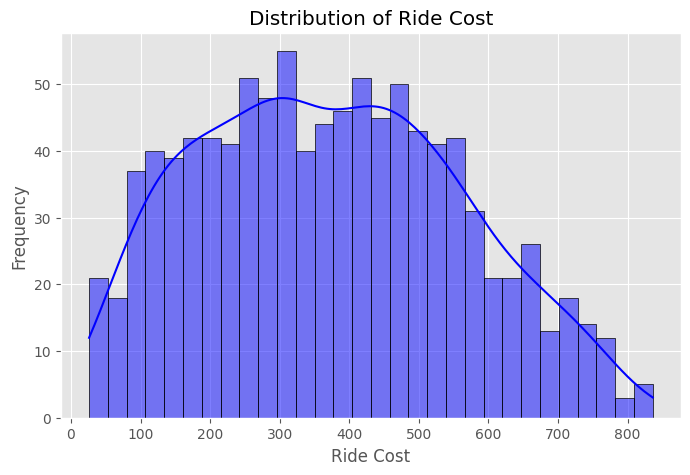

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(df["Historical_Cost_of_Ride"], kde=True, bins=30, color="blue", edgecolor="black")
plt.title("Distribution of Ride Cost")
plt.xlabel("Ride Cost")
plt.ylabel("Frequency")
plt.show()

#### 🔹 Bar Chart - Location vs. Average Ride Cost

C:\Users\Ashish Kumar\AppData\Local\Temp\ipykernel_9712\2120926910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Location_Category", y="Historical_Cost_of_Ride", data=df, palette="pastel")


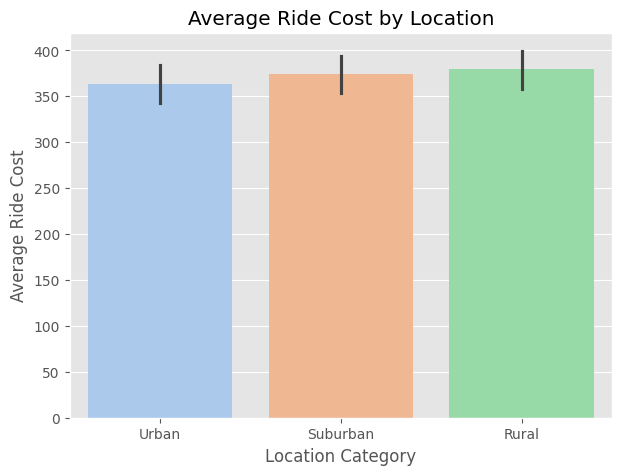

In [26]:
plt.figure(figsize=(7, 5))
sns.barplot(x="Location_Category", y="Historical_Cost_of_Ride", data=df, palette="pastel")
plt.title("Average Ride Cost by Location")
plt.xlabel("Location Category")
plt.ylabel("Average Ride Cost")
plt.show()

#### 🔹 Line Plot - Time of Booking vs. Average Ride Cost

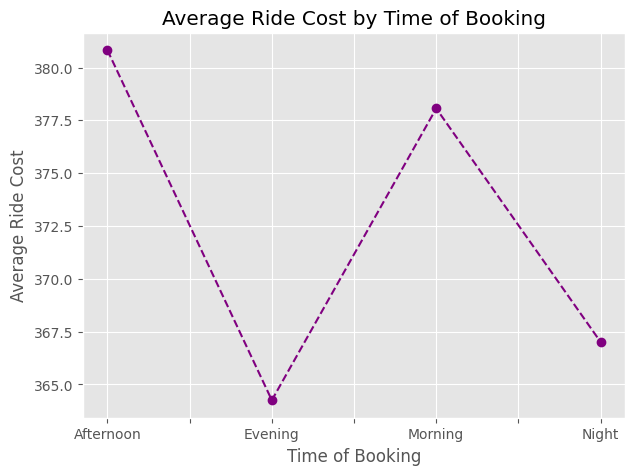

In [37]:
time_avg_cost = df.groupby("Time_of_Booking", observed=True)["Historical_Cost_of_Ride"].mean()
plt.figure(figsize=(7, 5))
time_avg_cost.plot(marker="o", linestyle="--", color="purple")
plt.title("Average Ride Cost by Time of Booking")
plt.xlabel("Time of Booking")
plt.ylabel("Average Ride Cost")
plt.show()

#### 🔹 Box Plot - Loyalty Status vs. Ride Cost

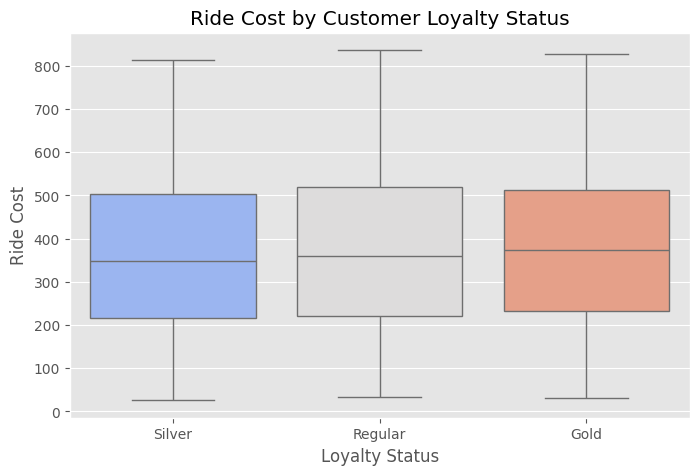

In [28]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="Customer_Loyalty_Status", y="Historical_Cost_of_Ride", data=df, hue="Customer_Loyalty_Status", 
palette="coolwarm", legend=False)
plt.title("Ride Cost by Customer Loyalty Status")
plt.xlabel("Loyalty Status")
plt.ylabel("Ride Cost")
plt.show()

#### 🔹 Scatter Plot - Ride Duration vs. Ride Cost

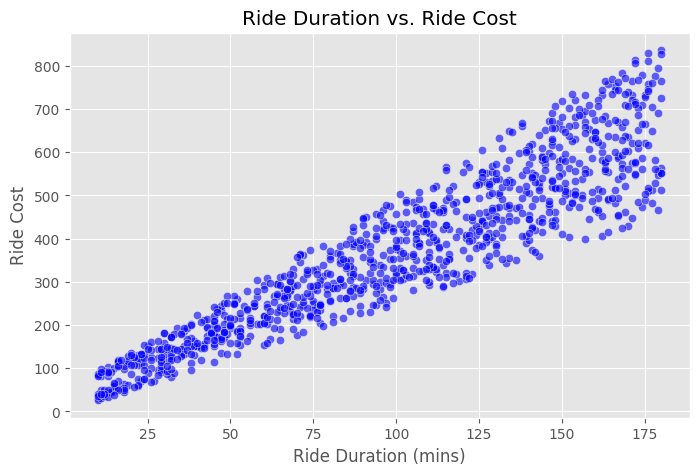

In [29]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="Expected_Ride_Duration", y="Historical_Cost_of_Ride", data=df, alpha=0.6, color='b')
plt.title("Ride Duration vs. Ride Cost")
plt.xlabel("Ride Duration (mins)")
plt.ylabel("Ride Cost")
plt.show()

#### 🔹 KDE Plot - Cost Distribution for Different Vehicle Types

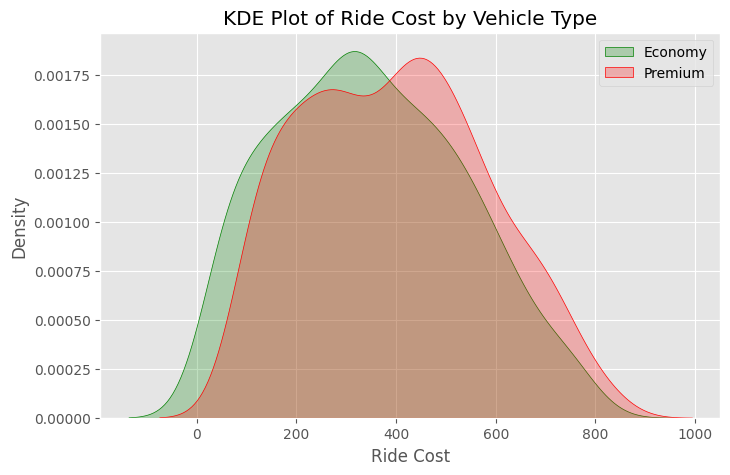

In [30]:
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Vehicle_Type"] == "Economy"]["Historical_Cost_of_Ride"], label="Economy", fill=True, color="green")
sns.kdeplot(df[df["Vehicle_Type"] == "Premium"]["Historical_Cost_of_Ride"], label="Premium", fill=True, color="red")
plt.title("KDE Plot of Ride Cost by Vehicle Type")
plt.xlabel("Ride Cost")
plt.ylabel("Density")
plt.legend()
plt.show()

#### 🔹 Heatmap - Correlation between Numeric Features

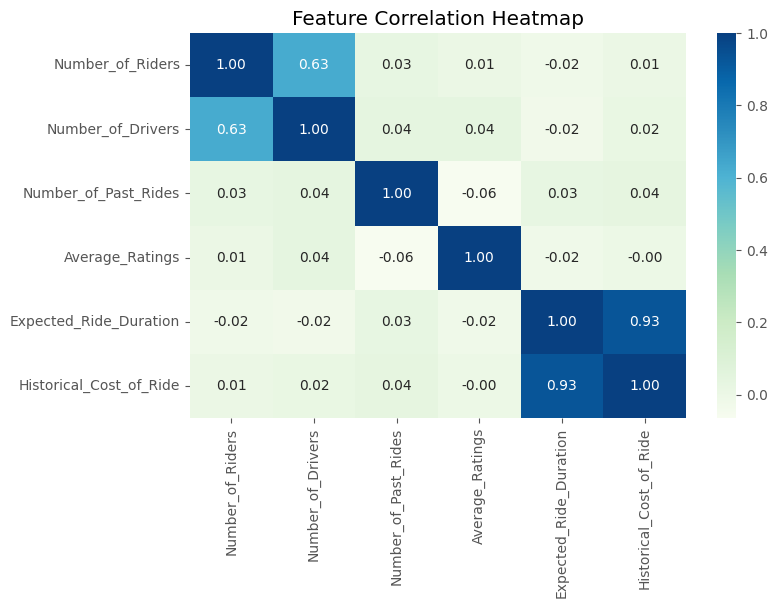

In [31]:
# Correlation Analysis
correlation_matrix = df.corr(numeric_only=True)
# print("\nCorrelation Matrix:\n", correlation_matrix)
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="GnBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

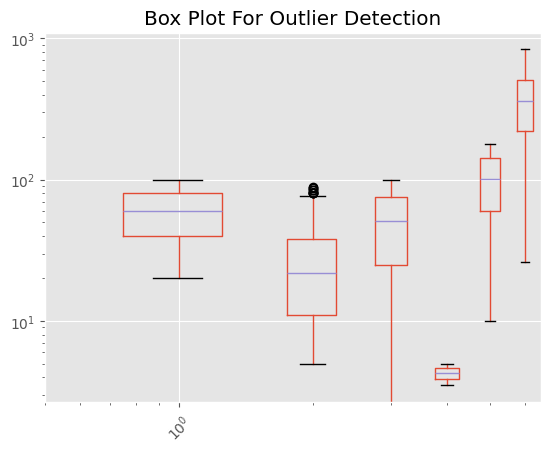

In [32]:
# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify Outliers
outlier_iqr = ((df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound))
# IQR is based on percentiles (median, Q1, Q3) which is good for skewed data
# print("Outliers detected using IQR method: ", outlier_iqr)
df[numerical_columns].boxplot(rot=45)
plt.title("Box Plot For Outlier Detection")
plt.xscale("log")
plt.yscale("log")
plt.show()

#### 🟢 Box Plot: Ride Cost by Location Category

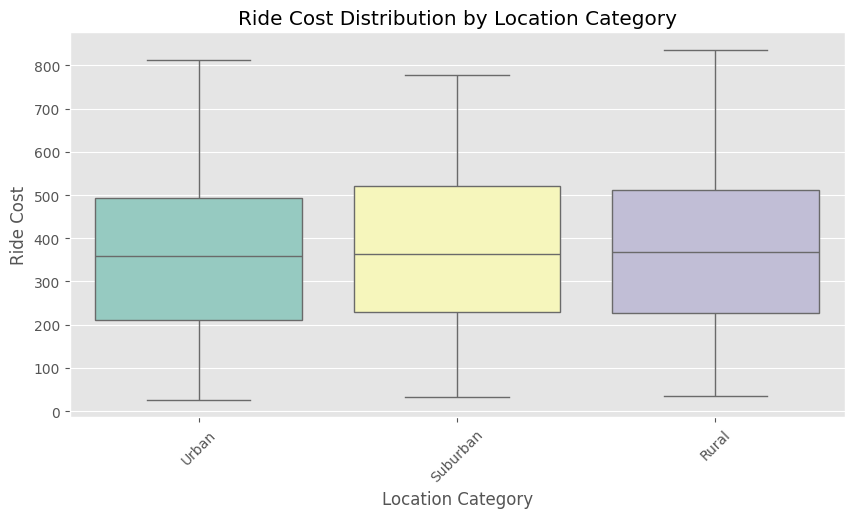

In [33]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Location_Category", y="Historical_Cost_of_Ride", data=df, palette="Set3", hue="Location_Category")
plt.title("Ride Cost Distribution by Location Category")
plt.xlabel("Location Category")
plt.ylabel("Ride Cost")
plt.xticks(rotation=45)
plt.show()

### Executing Histogram on all the columns in one go

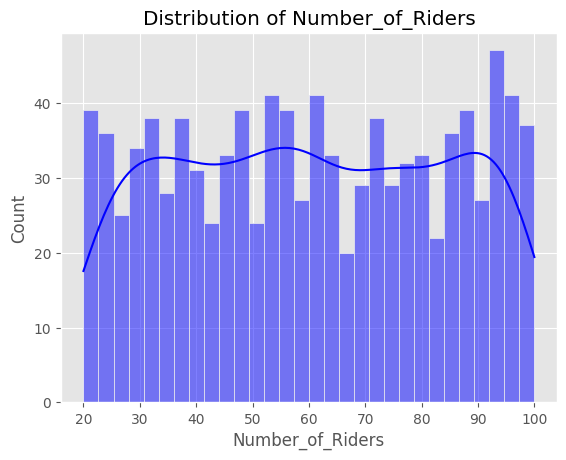

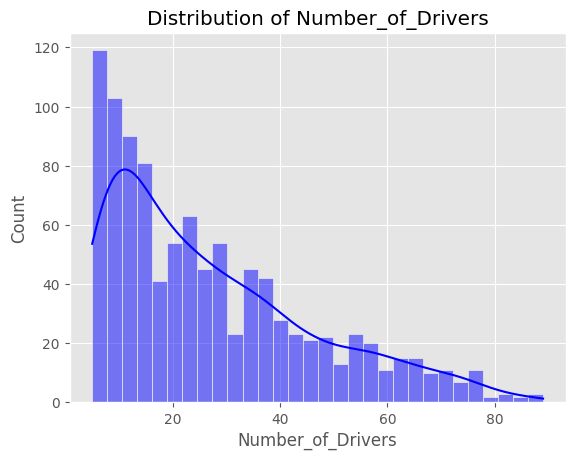

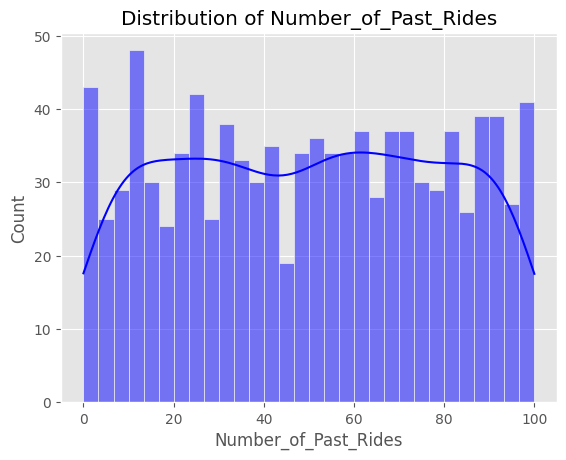

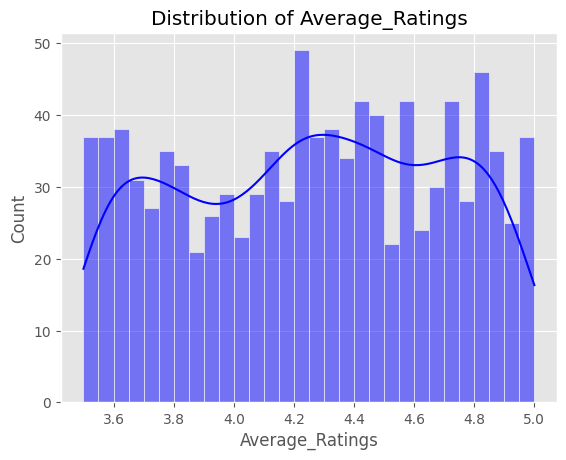

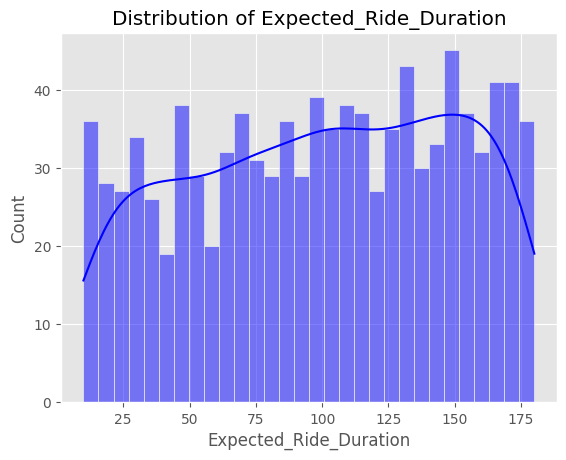

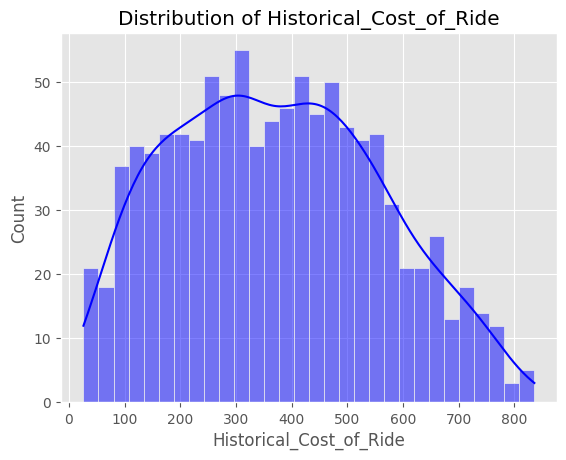

In [34]:
for col in numerical_columns:
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.show()

##### Insights for Pricing Strategy & Customer Targeting

In [35]:
# Summary statistics grouped by Customer Loyalty Status
print("Average Ride Cost by Loyalty Status:")
print(df.groupby("Customer_Loyalty_Status")["Historical_Cost_of_Ride"].describe())

# Summary statistics grouped by Location Category
print("\n Average Ride Cost by Location Category:")
print(df.groupby("Location_Category")["Historical_Cost_of_Ride"].describe())

Average Ride Cost by Loyalty Status:
                         count        mean         std        min         25%  \
Customer_Loyalty_Status                                                         
Gold                     313.0  376.118746  184.967070  31.565676  233.506624   
Regular                  320.0  380.125251  189.611633  34.574093  220.372179   
Silver                   367.0  362.772140  186.956263  25.993449  215.308300   

                                50%         75%         max  
Customer_Loyalty_Status                                      
Gold                     373.975636  512.449393  828.213135  
Regular                  358.951011  520.301477  836.116419  
Silver                   348.669562  503.742632  814.419556  

 Average Ride Cost by Location Category:
                   count        mean         std        min         25%  \
Location_Category                                                         
Rural              332.0  379.942172  187.224517  36.00

In [36]:
from scipy import stats
from statsmodels.stats.weightstats import ztest

# 1. Descriptive Statistics 
print("=== Descriptive Statistics ===")
print(df["Historical_Cost_of_Ride"].describe())
print("\n")

# 2. Z-Test: Is mean ride cost significantly different from ₹300? 
print("=== Z-Test ===")
z_stat, z_pval = ztest(df["Historical_Cost_of_Ride"], value=300)
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {z_pval:.4f}")
print("Conclusion:", "Significant difference" if z_pval < 0.05 else "No significant difference")
print("\n")

# 3. T-Test: Economy vs Premium 
print("=== T-Test: Economy vs Premium ===")
eco_rides = df[df["Vehicle_Type"] == "Economy"]["Historical_Cost_of_Ride"]
prem_rides = df[df["Vehicle_Type"] == "Premium"]["Historical_Cost_of_Ride"]
t_stat, t_pval = stats.ttest_ind(eco_rides, prem_rides)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {t_pval:.4f}")
print("Conclusion:", "Significant difference" if t_pval < 0.05 else "No significant difference")
print("\n")

#  4. P-Test: Proportion of Economy Rides 
print("=== P-Test: Proportion of Economy Rides ===")
count_eco = (df["Vehicle_Type"] == "Economy").sum()
total_rides = len(df)
p_test = stats.binomtest(count_eco, n=total_rides, p=0.5, alternative='two-sided')  # updated function name
print(f"Economy Count: {count_eco} / {total_rides}")
print(f"P-value: {p_test.pvalue:.4f}")
print("Conclusion:", "Proportion significantly different from 50%" if p_test.pvalue < 0.05 else "No significant difference")


=== Descriptive Statistics ===
count    1000.000000
mean      372.502623
std       187.158756
min        25.993449
25%       221.365202
50%       362.019426
75%       510.497504
max       836.116419
Name: Historical_Cost_of_Ride, dtype: float64


=== Z-Test ===
Z-statistic: 12.2502
P-value: 0.0000
Conclusion: Significant difference


=== T-Test: Economy vs Premium ===
T-statistic: -4.2276
P-value: 0.0000
Conclusion: Significant difference


=== P-Test: Proportion of Economy Rides ===
Economy Count: 478 / 1000
P-value: 0.1739
Conclusion: No significant difference
